In [ ]:
# Importing.... 
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
import torch.optim as optim

import numpy as np
import pandas as pd

import os
import re
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Encoder Decoder

![](https://d2l.ai/_images/encoder-decoder.svg)


![](https://d2l.ai/_images/seq2seq.svg)

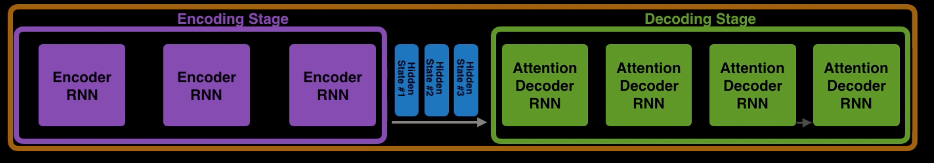

source: https://www.guru99.com/seq2seq-model.html

# Download Data
Download English-French sentence pairs. You can download other language pairs here: http://www.manythings.org/anki/ 

In [ ]:
!wget http://www.manythings.org/anki/fra-eng.zip
!unzip fra-eng.zip

# Preparing Vocabulary




In [ ]:
SOS_token = 0
EOS_token = 1
MAX_LENGTH = 5 # 20

#initialize Lang Class
class Lang:
   def __init__(self):
       #initialize containers to hold the words and corresponding index
       self.word2index = {}
       self.word2count = {}
       self.index2word = {0: "SOS", 1: "EOS"}
       self.n_words = 2  # Count SOS and EOS

   # split a sentence into words and add it to the container
   def addSentence(self, sentence):
       for word in sentence.split(' '):
           self.addWord(word)

  # If the word is not in the container, the word will be added to it, 
  # else, update the word counter
   def addWord(self, word):
       if word not in self.word2index:
           self.word2index[word] = self.n_words
           self.word2count[word] = 1
           self.index2word[self.n_words] = word
           self.n_words += 1
       else:
           self.word2count[word] += 1

# Preprocessing

In [ ]:
# Normalize every sentence
def normalize_sentence(df, lang):
   sentence = df[lang].str.lower()
   sentence = sentence.str.replace('[^A-Za-z\s]+', '')
   sentence = sentence.str.normalize('NFD')
   sentence = sentence.str.encode('ascii', errors='ignore').str.decode('utf-8')
   return sentence

def read_sentence(df, lang1, lang2):
   sentence1 = normalize_sentence(df, lang1)
   sentence2 = normalize_sentence(df, lang2)
   return sentence1, sentence2

def read_file(loc, lang1, lang2):
   df = pd.read_csv(loc, sep='\t', header=None, 
                    names=[lang1, lang2, 'attribution'])
   return df

def process_data(file, lang1,lang2):
   # Read file, read sentences, make Language Class for source and target
   
   # Return Language Class objects for Source, Target. 
   # Also return pairs 
   return source, target, pairs

# Read and process data

In [ ]:
# process


# print number of words


In [ ]:
# show some pairs


In [ ]:
# show some index-word combinations


# Tensors from sentences

In [ ]:
def indexesFromSentence(lang, sentence):
   return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
   indexes = indexesFromSentence(lang, sentence)
   indexes.append(EOS_token)
   return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)

def tensorsFromPair(input_lang, output_lang, pair):
   # ...


# Encoder

In [ ]:
class Encoder(nn.Module):
   # init
      
       # set the encoder input dimension, embedding dimension, 
       # hidden dimesion, and number of layers 

       # initialize the embedding layer with input and embedding dimension
       
       # intialize the GRU to take the input dimension of embedding, and output 
       # dimension of hidden and set the number of gru layers
              
   def forward(self, input, hidden):

   # init hidden


# Decoder

In [ ]:
class Decoder(nn.Module):
   # init

       # set the encoder output dimension, embedding dimension, 
       # hidden dimension, and number of layers 

       # initialize every layer with the appropriate dimension. 
       # For the decoder layer, it will consist of an embedding, 
       # GRU, a Linear layer and a Log softmax activation function.
      
   def forward(self, input, hidden):
       # reshape the input to (1, batch_size)



# Let's combine Encoder and Decoder into Seq2Seq

In [ ]:
class Seq2Seq(nn.Module):
   def __init__(self, encoder, decoder, device):
       super().__init__()
      
       # initialize the encoder and decoder, encoder hidden

   def forward(...):
       # get the input length (number of words in sentence)
       

      
       # initialize a variable to hold the predicted outputs

       # encode every word in a sentence

       # use the encoder’s hidden layer as the decoder initial hidden layer
  
       # add a token before the first predicted word



       # topk is used to get the top K value over a list
       # predict the output word from the current target word. 
       # If we enable the teaching force,  then the next decoder input is the 
       # next word, else, use the decoder output highest value. 


       return outputs

In [ ]:
embed_size = 256
hidden_size = 512
num_layers = 1
num_iteration = 1000 # try 50000 or more for meaningful outputs

#create encoder-decoder model



# Training this Seq2Seq model

In [ ]:
teacher_forcing_ratio = 0.5

# Training step and return loss 
def model_step(model, input_tensor, target_tensor, model_optimizer, criterion):


# Training Loop 
def trainModel(model, source, target, pairs, num_iteration=20000):


In [ ]:
eng_eg, fra_eg = random.choice(pairs)
eng_eg, fra_eg

In [ ]:
input_tensor = tensorFromSentence(source, eng_eg)
output_tensor = tensorFromSentence(target, fra_eg)

In [ ]:
# let's see a prediction



In [ ]:
# decode

In [ ]:
decoded_words

# Evaluate model predictions

In [ ]:
def evaluate(model, input_lang, output_lang, sentences):




In [ ]:
def evaluateRandomly(model, source, target, pairs, n=10):
   for i in range(n):
       pair = random.choice(pairs)
       print('source: {}'.format(pair[0]))
       print('target: {}'.format(pair[1]))
       output_words = evaluate(model, source, target, pair)
       output_sentence = ' '.join(output_words)
       print('predicted: {}'.format(output_sentence))
       print('----')

In [ ]:
evaluateRandomly(model, source, target, pairs)

# Bahdanau Attention

source: https://blog.floydhub.com/attention-mechanism/


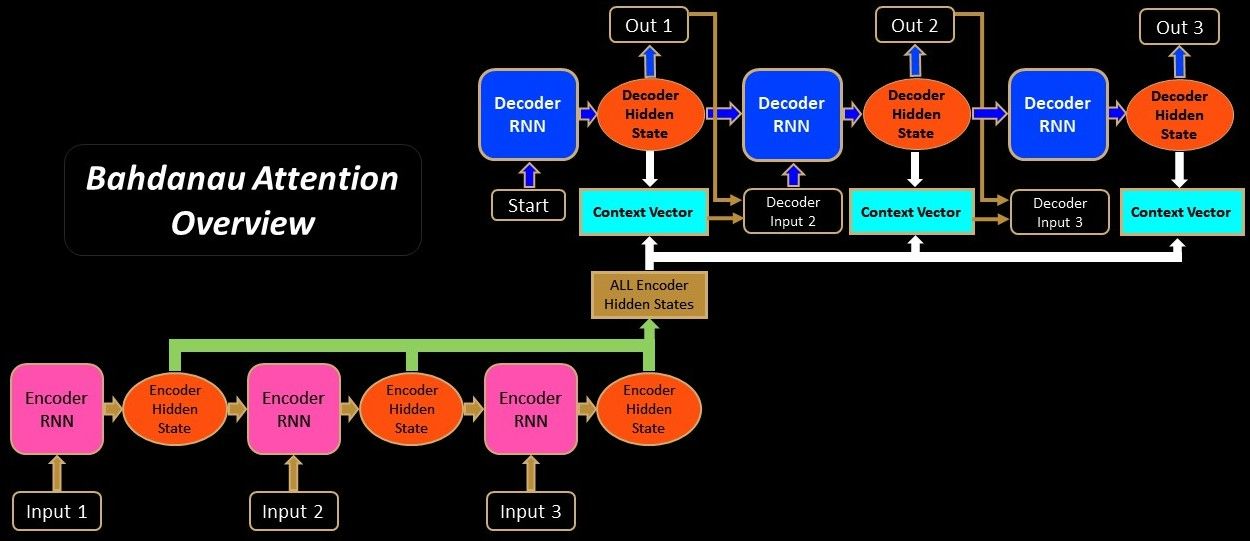

## Encoder Network

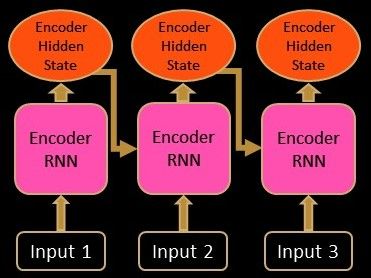

## Alignment Score

$$
\begin{eqnarray}
  \text { score }_{\text {alignment }} &=& W_{\text {combined }} \cdot \tanh \left(W_{\text {decoder }} \cdot H_{\text {decoder }}+W_{\text {encoder }} \cdot H_{\text {encoder }}\right) \\ 
\text{Attention weights} &=& \text{Softmax}(\text{ score }_{\text {alignment}})
\end{eqnarray}
$$

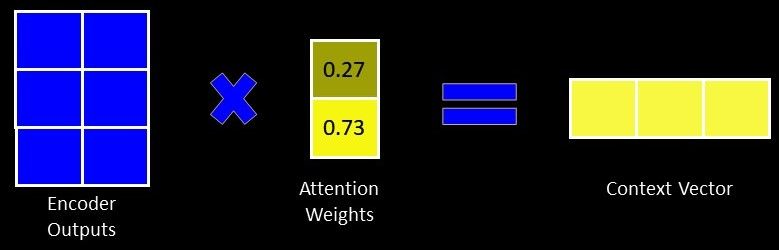

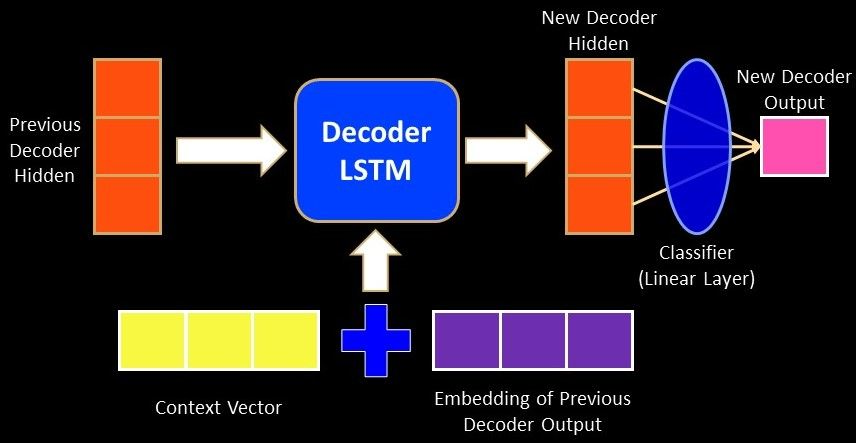

In [ ]:
# let's modify the Decoder to include Attention


In [ ]:
class Seq2SeqAttn(nn.Module):
   def __init__(self, encoder, decoder, device):
       super().__init__()
      
       # initialize the encoder and decoder
       self.encoder = encoder
       self.decoder = decoder
       self.device = device
       self.encoder_hidden = self.encoder.init_hidden().to(self.device)

   def forward(self, source, target, teacher_forcing_ratio=0.5):
       # get the input length (number of words in sentence)
       input_length = source.size(0) 
       
       batch_size = source.shape[1]
       target_length = target.shape[0]

       vocab_size = self.decoder.output_dim
      
       # initialize a variable to hold the predicted outputs
       outputs = torch.zeros(target_length, batch_size, 
                             vocab_size).to(self.device)

       # All encoder outputs to decoder
       ......


       # use the encoder’s hidden layer as the decoder initial hidden layer
       decoder_hidden = encoder_hidden.to(device)
  
       # add a token before the first predicted word
       decoder_input = torch.tensor([SOS_token], device=device)  # SOS

       # topk is used to get the top K value over a list
       # predict the output word from the current target word. 
       # If we enable the teaching force,  then the #next decoder input is the 
       # next word, else, use the decoder output highest value. 
       for t in range(target_length):   
           .......

           outputs[t] = decoder_output
           teacher_force = random.random() < teacher_forcing_ratio
           topv, topi = decoder_output.topk(1)
           input = (target[t] if teacher_force else topi)
           if (teacher_force == False and input.item() == EOS_token):
               break

       return outputs

In [ ]:
embed_size = 256
hidden_size = 256
num_layers = 1
num_iteration = 1000 # try with >50000 for meaningful outputs  

#create encoder-decoder model
encoder = Encoder(input_size, hidden_size, embed_size, num_layers)
decoder = BahdanauDecoder(output_size, hidden_size, embed_size, num_layers)

model = Seq2SeqAttn(encoder, decoder, device).to(device)

In [ ]:
print(encoder), print(decoder)

In [ ]:
model = trainModel(model, source, target, pairs, num_iteration)

In [ ]:
evaluateRandomly(model, source, target, pairs)